<a href="https://colab.research.google.com/github/7-sumit/Bike-Sharing-Demand-Prediction/blob/main/Bike_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/Bike Sharing Demand Prediction - Sumit Berde/SeoulBikeData.csv'

df = pd.read_csv(file_path,encoding="latin")


In [ ]:
# Renaming columns to remove units 
df = df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation','Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'})

In [ ]:
# Taking only functioning days into account.Hence dropping 295 rows 
df = df[df['Functioning_day']=='Yes']

# Dropping 'Functioning_day' feature as it is no point keeping 'Yes' category in categorical column.
df.drop(columns=['Functioning_day'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_bike_count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
Temperature,8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40
Humidity,8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00
Wind_speed,8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40
Visibility,8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
Dew_point_temperature,8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
Solar_radiation,8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall,8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00
Snowfall,8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80


In [ ]:
# Converting 'date' datatype to 'datetime' datatype
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month from date column
df['Month']=df['Date'].dt.month

# Extracting day_name from date column
df['Day_name']=df['Date'].dt.day_name()

In [ ]:
# Checking if it is a weekend or not using 'Day_name' column
df['Is_weekend']=df['Day_name'].apply(lambda x:1 if (x=='Saturday'or x=='Sunday') else 0)

In [ ]:
# Dropping columns 'Date' and 'Day_name' as we got required 'Is_weekend' column for analysis
df.drop(columns=['Date','Day_name'],axis=1,inplace=True)

In [ ]:
df.shape

(8465, 14)

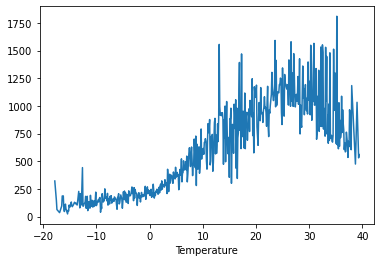

In [ ]:
df.groupby('Temperature')['Rented_bike_count'].median().plot()

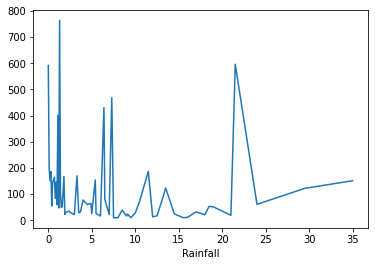

In [ ]:
df.groupby('Rainfall')['Rented_bike_count'].median().plot()

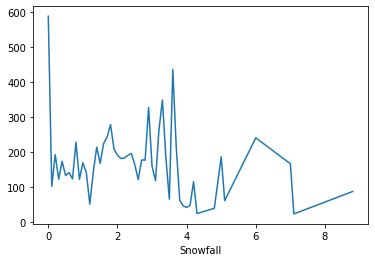

In [ ]:
df.groupby('Snowfall')['Rented_bike_count'].median().plot()

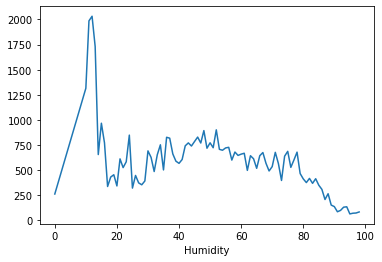

In [ ]:
df.groupby('Humidity')['Rented_bike_count'].median().plot()

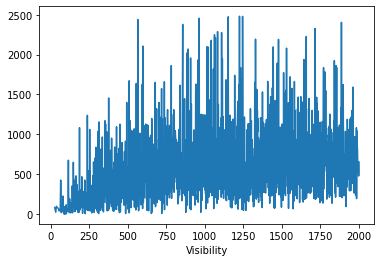

In [ ]:
df.groupby('Visibility')['Rented_bike_count'].median().plot()

In [ ]:
IQR = df['Rented_bike_count'].quantile(0.75)-df['Rented_bike_count'].quantile(0.25)

lower_bridge = df['Rented_bike_count'].quantile(0.25) - IQR*(1.5)
upper_bridge = df['Rented_bike_count'].quantile(0.75) + IQR*(1.5)


In [ ]:
df = df[df['Rented_bike_count'] <= upper_bridge]

In [ ]:
def visibility_binning(x):
 '''Creates bins for visibility feature'''
 try: 
    if x['Visibility']<=500:
      return 'Heavy_snow'
    elif x['Visibility']<1000:
      return 'Medium_snow'
    else:
      return 'Light_snow'
 except:
    print('Check your code')   

In [ ]:
df.shape

(8313, 14)

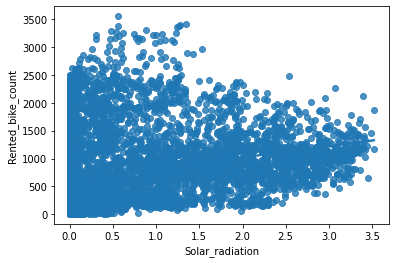

In [ ]:
sns.regplot(x=df['Solar_radiation'],y=df['Rented_bike_count'])

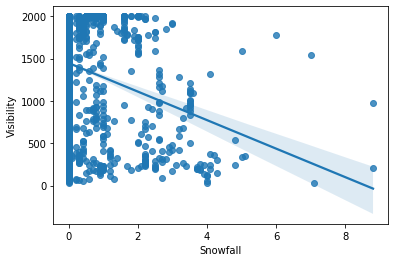

In [ ]:
sns.regplot(x=df['Snowfall'],y=df['Visibility'])

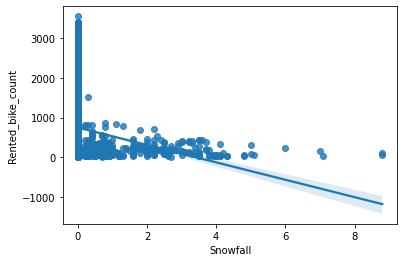

In [ ]:
sns.regplot(x=df['Snowfall'],y=df['Rented_bike_count'])

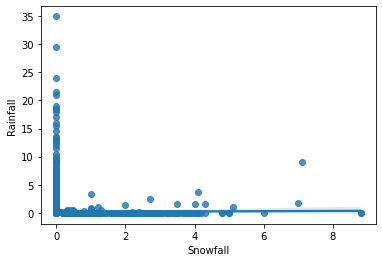

In [ ]:
sns.regplot(x=df['Snowfall'],y=df['Rainfall'])

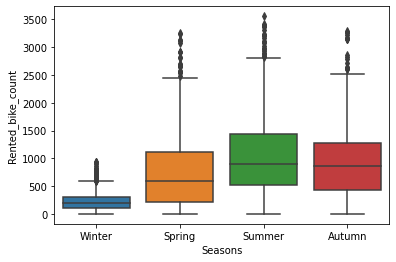

In [ ]:
sns.boxplot(x=df['Seasons'],y=df['Rented_bike_count'])

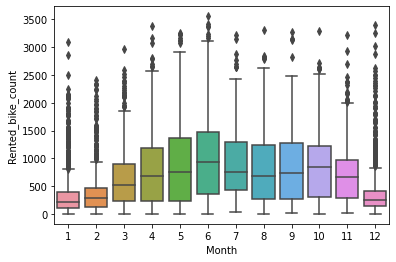

In [ ]:
sns.boxplot(x=df['Month'],y=df['Rented_bike_count'])

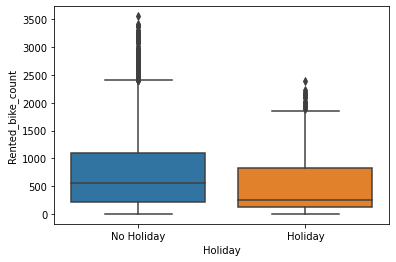

In [ ]:
sns.boxplot(x=df['Holiday'],y=df['Rented_bike_count'])

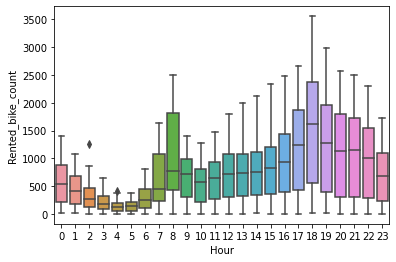

In [ ]:
sns.boxplot(x=df['Hour'],y=df['Rented_bike_count'])

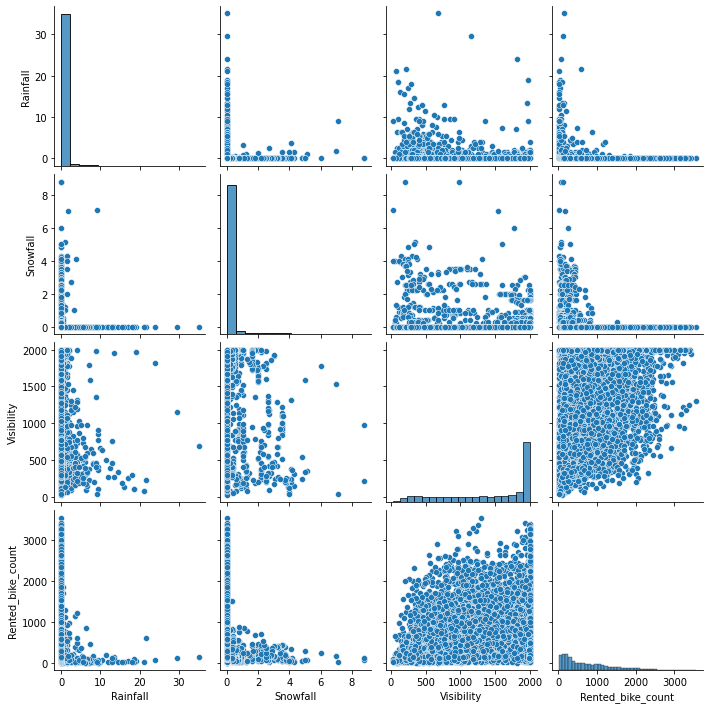

In [ ]:
sns.pairplot(dff)

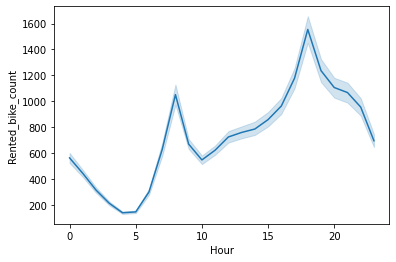

In [ ]:
sns.lineplot(x=df['Hour'],y=df['Rented_bike_count'])

In [ ]:
def visibility_binning(x):
 '''Creates bins for visibility feature'''
 try: 
    if x['Visibility']<=500 and x['Snowfall']>2:
      return 'Heavy_snow'
    elif x['Visibility']<1000:
      return 'Medium_snow'
    else:
      return 'Light_snow'
 except:
    print('Check your code')   

In [ ]:
df['Binned_visibity'] = df.apply(lambda x:visibility_binning(x),axis=1)

In [ ]:
# Creating One_Hot_Encoding for 'Seasons' feature
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

#df=pd.get_dummies(df,columns=['Month'],prefix='Month',drop_first=True)

#df=pd.get_dummies(df,columns=['Hour'],prefix='Hour',drop_first=True)

# Using binary label encoding for 'Holiday' feature. Holiday=1 and No_holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
df.drop(columns=['Dew_point_temperature','Wind_speed','Visibility','Solar_radiation'],axis=1,inplace=True)

In [ ]:
df.tail()

,Rented_bike_count,Hour,Temperature,Humidity,Rainfall,Snowfall,Holiday,Is_weekend,Seasons_Spring,Seasons_Summer,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
8755,1003,19,4.2,34,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,20,3.4,37,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,21,2.6,39,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,22,2.1,41,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8759,584,23,1.9,43,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Transform Your data

# Creating X variable to store independent variable
X = df.drop(columns='Rented_bike_count',axis=1)

# Creating y variable to store target variable and applying square root transformation for getting approx normal distribution
y = np.sqrt(df['Rented_bike_count'])

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=7)

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

stn_scalar = StandardScaler()
X_train= stn_scalar.fit_transform(X_train)
X_test = stn_scalar.transform(X_test)

In [ ]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.4 MB/s eta 0:00:00


In [ ]:
# Importing libaries
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'criterion': Categorical(['squared_error','friedman_mse','absolute_error']),
                'max_depth':Integer(3,10),
                'min_samples_split':Integer(20,100),
                'min_samples_leaf':Integer(20,100),
                'min_impurity_decrease':Real(2,100,prior='log-uniform')}

decision_tree_regressor_1 = DecisionTreeRegressor(random_state=7)
bayes_search = BayesSearchCV(decision_tree_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,y_train)

BayesSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=7), n_iter=32,
              random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'criterion': Categorical(categories=('squared_error', 'friedman_mse', 'absolute_error'), prior=None),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_impurity_decrease': Real(low=2, high=100, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=20, high=100, prior='uniform', transform='normalize')})

In [ ]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_impurity_decrease', 2.0), ('min_samples_leaf', 20), ('min_samples_split', 20)])
The best negative mean squred error value is -23.70005737250346


In [ ]:
# Fitting tuned model 
decision_tree_regressor_cv = bayes_search.best_estimator_
decision_tree_regressor_cv.fit(X_train,y_train)

# Predict on the model
y_pred_train = decision_tree_regressor_cv.predict(X_train)
y_pred_test = decision_tree_regressor_cv.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 52738.12428779888.
The Root Mean Squared Error(RMSE) is 229.6478266559448.
The R2 Score is 0.8477882060795887.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 48380.87333134729.
The Root Mean Squared Error(RMSE) is 219.95652600308838.
The R2 Score is 0.8603640227890268.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 64088.32549641161.
The Root Mean Squared Error(RMSE) is 253.15672121516272.
The R2 Score is 0.8128105032208468.


In [ ]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 61973.45097396416.
The Root Mean Squared Error(RMSE) is 248.9446745242086.
The R2 Score is 0.818987639142898.


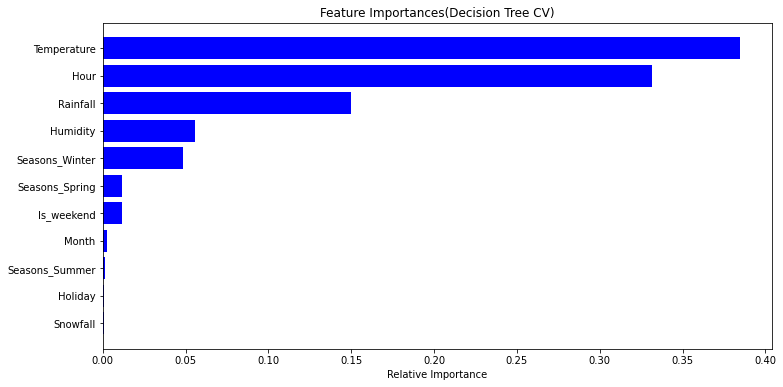

In [ ]:
# Feature importances
imp_variables=X.columns
importances = decision_tree_regressor_cv.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree CV)')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance');